<a href="https://colab.research.google.com/github/sushantdhavane/Heart_disease_ML_project/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I. Importing libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## II.dataset

In [18]:
dataset = pd.read_csv('heart1.csv')

In [19]:
type(dataset)

pandas.core.frame.DataFrame

In [20]:
dataset.shape

(303, 14)

In [21]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [23]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


####  understand columns:

In [25]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [26]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [27]:
dataset["target"].unique()

array([1, 0])

###  correlation between columns

In [28]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [29]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

### target variable:

target
1    165
0    138
Name: count, dtype: int64


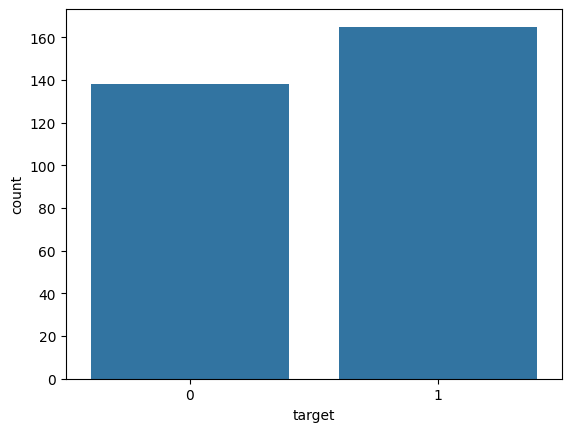

In [30]:
y = dataset["target"]
sns.countplot(dataset, x="target")

target_temp = dataset.target.value_counts()
print(target_temp)

In [31]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))



Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


###  analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [32]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

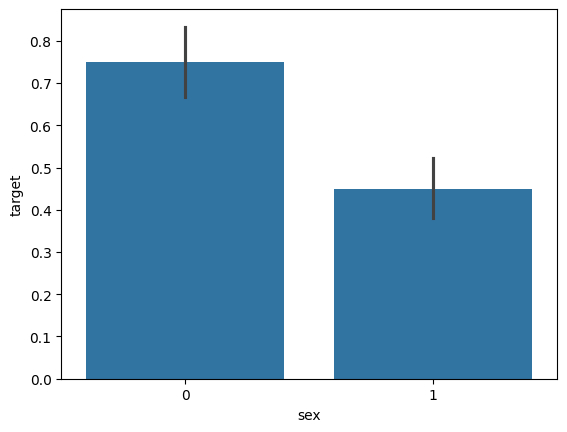

In [33]:
sns.barplot(x=dataset["sex"],y=y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [34]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

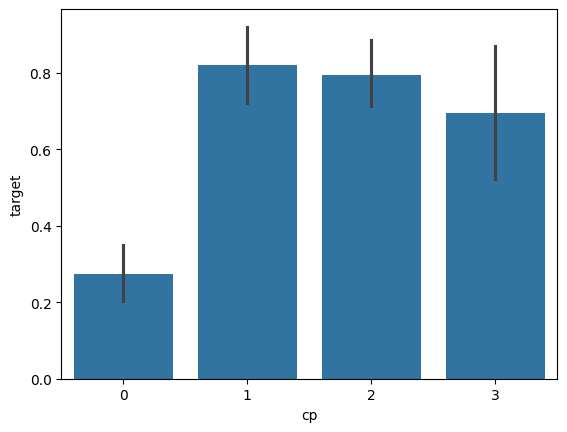

In [35]:
sns.barplot(x=dataset["cp"],y=y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [36]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [37]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

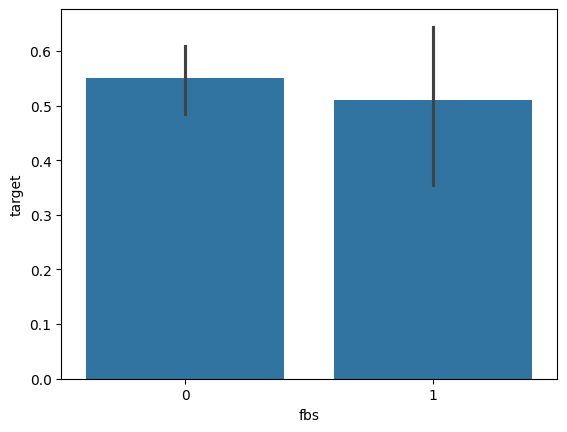

In [38]:
sns.barplot(x=dataset["fbs"],y=y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [39]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

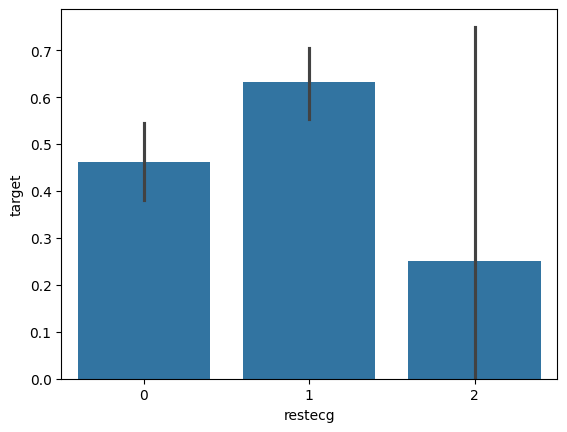

In [40]:
sns.barplot(x=dataset["restecg"],y=y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [41]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

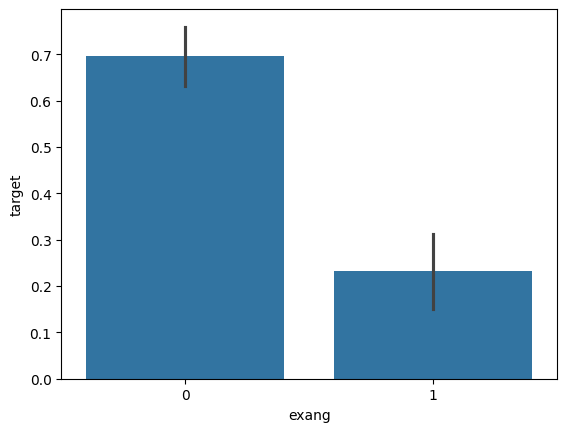

In [42]:
sns.barplot(x=dataset["exang"],y=y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [43]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

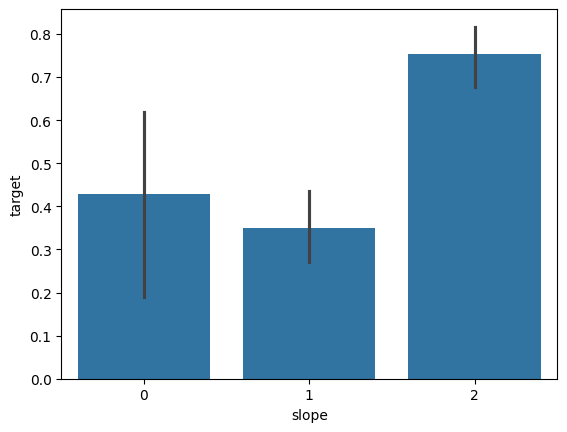

In [44]:
sns.barplot(x=dataset["slope"],y=y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### A**nalysing the 'ca' feature**

In [45]:
#number of major vessels (0-3) colored by flouroscopy

In [46]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='count'>

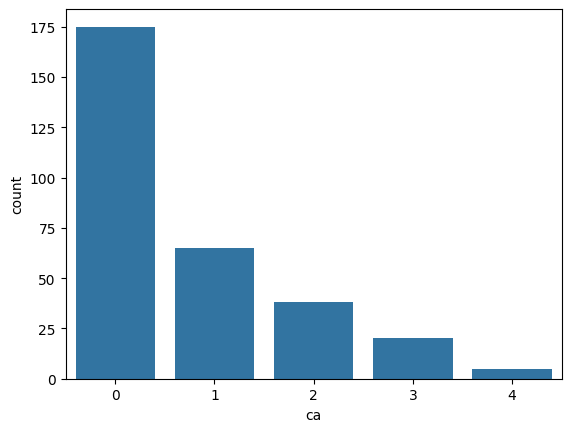

In [47]:
sns.countplot(dataset,x=dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

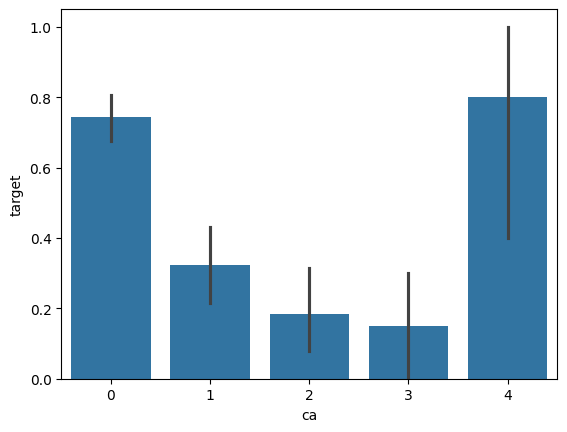

In [48]:
sns.barplot(x=dataset["ca"],y=y)

##### ca=4 has astonishingly large number of heart patients

In [49]:
### Analysing the 'thal' feature

In [50]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

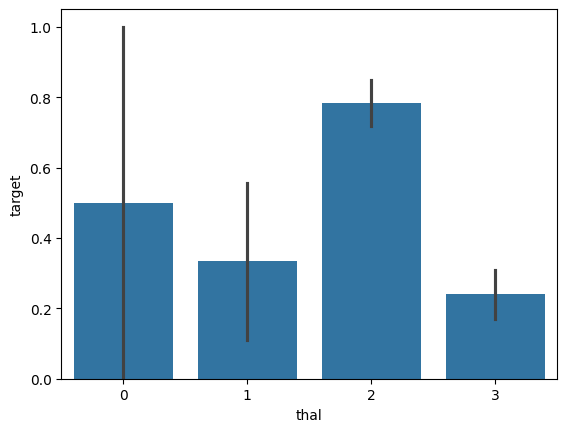

In [51]:
sns.barplot(x=dataset["thal"],y=y)

In [52]:
predictors = dataset.drop("target",axis=1)
#target = dataset["target"]

## IV. Train Test split

In [53]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [54]:
predictors.shape

(303, 13)

In [55]:
predictors.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [56]:
X_train.shape

(242, 13)

In [57]:
X_test.shape

(61, 13)

In [58]:
Y_train.shape

(242,)

In [59]:
Y_test.shape

(61,)

## V. Model Fitting

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
Y_pred_lr.shape

(61,)

In [63]:
acc_score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(acc_score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [64]:
pre_score_lr = round(precision_score(Y_pred_lr,Y_test)*100,2)

print("The precision score achieved using Logistic Regression is: "+str(pre_score_lr)+" %")

The precision score achieved using Logistic Regression is: 88.24 %


In [65]:
rec_score_lr = round(recall_score(Y_pred_lr,Y_test)*100,2)

print("The recall score achieved using Logistic Regression is: "+str(rec_score_lr)+" %")

The recall score achieved using Logistic Regression is: 85.71 %


In [66]:
f1_score_lr = round(f1_score(Y_pred_lr,Y_test)*100,2)

print("The f1 score achieved using Logistic Regression is: "+str(f1_score_lr)+" %")

The f1 score achieved using Logistic Regression is: 86.96 %


# K nearest neighbour


In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [68]:
Y_pred_knn.shape

(61,)

In [69]:
acc_score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(acc_score_knn)+" %")

The accuracy score achieved using KNN is: 70.49 %


In [70]:
pre_score_knn = round(precision_score(Y_pred_knn,Y_test)*100,2)

print("The precision score achieved using KNN is: "+str(pre_score_knn)+" %")

The precision score achieved using KNN is: 73.53 %


In [71]:
rec_score_knn = round(recall_score(Y_pred_knn,Y_test)*100,2)

print("The recall score achieved using KNN is: "+str(rec_score_knn)+" %")

The recall score achieved using KNN is: 73.53 %


In [72]:
f1_score_knn = round(f1_score(Y_pred_knn,Y_test)*100,2)

print("The f1 score achieved using KNN is: "+str(f1_score_knn)+" %")

The f1 score achieved using KNN is: 73.53 %


# Naive Bayers


In [73]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [74]:
Y_pred_nb.shape

(61,)

In [75]:
acc_score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(acc_score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [76]:
pre_score_nb = round(precision_score(Y_pred_nb,Y_test)*100,2)

print("The precision score achieved using Naive Bayes is: "+str(pre_score_nb)+" %")

The precision score achieved using Naive Bayes is: 91.18 %


In [77]:
rec_score_nb = round(recall_score(Y_pred_nb,Y_test)*100,2)

print("The recall score achieved using Naive Bayes is: "+str(rec_score_nb)+" %")

The recall score achieved using Naive Bayes is: 83.78 %


In [78]:
f1_score_nb = round(f1_score(Y_pred_nb,Y_test)*100,2)

print("The f1 score achieved using Naive Bayes is: "+str(f1_score_nb)+" %")

The f1 score achieved using Naive Bayes is: 87.32 %


# SVM

In [79]:
from sklearn import svm

sv = svm.SVC(kernel="linear")

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [80]:
Y_pred_svm.shape

(61,)

In [81]:
acc_score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(acc_score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [82]:
pre_score_svm = round(precision_score(Y_pred_svm,Y_test)*100,2)

print("The precision score achieved using Linear SVM is: "+str(pre_score_svm)+" %")

The precision score achieved using Linear SVM is: 88.24 %


In [83]:
rec_score_svm = round(recall_score(Y_pred_svm,Y_test)*100,2)

print("The recall score achieved using Linear SVM is: "+str(rec_score_svm)+" %")

The recall score achieved using Linear SVM is: 81.08 %


In [84]:
f1_score_svm = round(f1_score(Y_pred_svm,Y_test)*100,2)

print("The f1 score achieved using Linear SVM is: "+str(f1_score_svm)+" %")

The f1 score achieved using Linear SVM is: 84.51 %


# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(20):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [86]:
print(Y_pred_dt.shape)

(61,)


In [87]:
acc_score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(acc_score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [88]:
pre_score_dt = round(precision_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(pre_score_dt)+" %")

The accuracy score achieved using Decision Tree is: 82.35 %


In [89]:
rec_score_dt = round(recall_score(Y_pred_dt,Y_test)*100,2)

print("The recall score achieved using Decision Tree is: "+str(rec_score_dt)+" %")

The recall score achieved using Decision Tree is: 84.85 %


In [90]:
f1_score_dt = round(f1_score(Y_pred_dt,Y_test)*100,2)

print("The f1 score achieved using Decision Tree is: "+str(f1_score_dt)+" %")

The f1 score achieved using Decision Tree is: 83.58 %


# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(50):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [92]:
Y_pred_rf.shape

(61,)

In [93]:
Y_test.shape

(61,)

In [94]:
acc_score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(acc_score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [95]:
pre_score_rf = round(precision_score(Y_pred_rf,Y_test)*100,2)

print("The precison score achieved using Random Forest is: "+str(pre_score_rf)+" %")

The precison score achieved using Random Forest is: 88.24 %


In [96]:
rec_score_rf = round(recall_score(Y_pred_rf,Y_test)*100,2)

print("The recall score achieved using Random Forest is: "+str(rec_score_rf)+" %")

The recall score achieved using Random Forest is: 90.91 %


In [97]:
f1_score_rf = round(f1_score(Y_pred_rf,Y_test)*100,2)

print("The f1 score achieved using Random Forest is: "+str(f1_score_rf)+" %")

The f1 score achieved using Random Forest is: 89.55 %


##OUTPUT AND FINAL SCORE

In [98]:
Acc_scores = [acc_score_lr,acc_score_nb,acc_score_svm,acc_score_knn,acc_score_dt,acc_score_rf]

algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(Acc_scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 70.49 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %


In [99]:
pre_scores = [pre_score_lr,pre_score_nb,pre_score_svm,pre_score_knn,pre_score_dt,pre_score_rf]

algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The Precision score achieved using "+algorithms[i]+" is: "+str(pre_scores[i])+" %")

The Precision score achieved using Logistic Regression is: 88.24 %
The Precision score achieved using Naive Bayes is: 91.18 %
The Precision score achieved using Support Vector Machine is: 88.24 %
The Precision score achieved using K-Nearest Neighbors is: 73.53 %
The Precision score achieved using Decision Tree is: 82.35 %
The Precision score achieved using Random Forest is: 88.24 %


In [100]:
rec_scores = [rec_score_lr,rec_score_nb,rec_score_svm,rec_score_knn,rec_score_dt,rec_score_rf]

algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The recall score achieved using "+algorithms[i]+" is: "+str(rec_scores[i])+" %")

The recall score achieved using Logistic Regression is: 85.71 %
The recall score achieved using Naive Bayes is: 83.78 %
The recall score achieved using Support Vector Machine is: 81.08 %
The recall score achieved using K-Nearest Neighbors is: 73.53 %
The recall score achieved using Decision Tree is: 84.85 %
The recall score achieved using Random Forest is: 90.91 %


In [101]:
f1_scores = [f1_score_lr,f1_score_nb,f1_score_svm,f1_score_knn,f1_score_dt,f1_score_rf]

algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The f1 score achieved using "+algorithms[i]+" is: "+str(f1_scores[i])+" %")

The f1 score achieved using Logistic Regression is: 86.96 %
The f1 score achieved using Naive Bayes is: 87.32 %
The f1 score achieved using Support Vector Machine is: 84.51 %
The f1 score achieved using K-Nearest Neighbors is: 73.53 %
The f1 score achieved using Decision Tree is: 83.58 %
The f1 score achieved using Random Forest is: 89.55 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

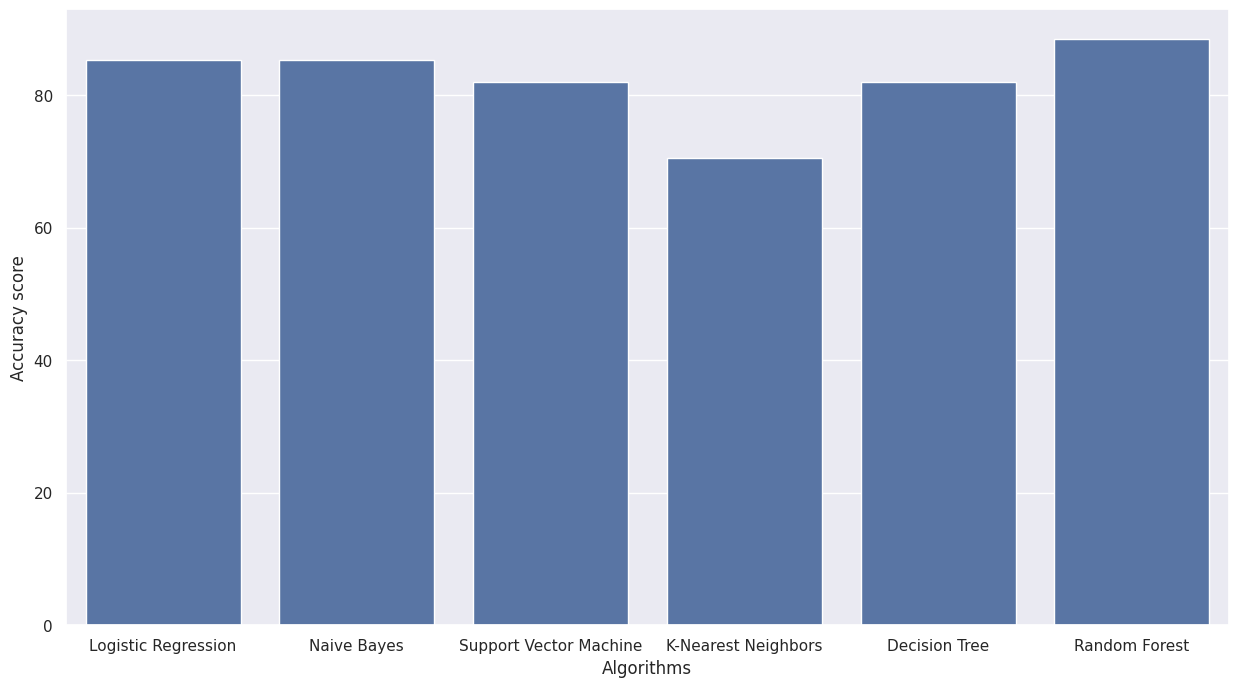

In [102]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=Acc_scores)

<Axes: xlabel='Algorithms', ylabel='Precision score'>

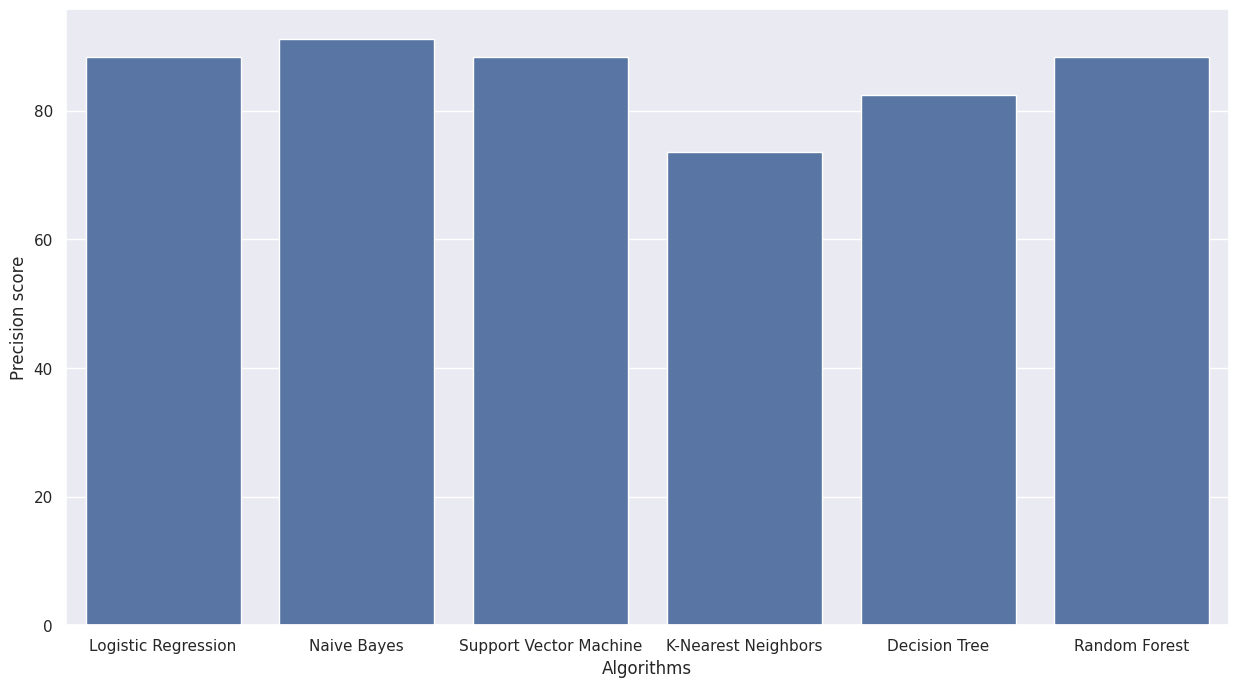

In [103]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Precision score")

sns.barplot(x=algorithms,y=pre_scores)

<Axes: xlabel='Algorithms', ylabel='Recall score'>

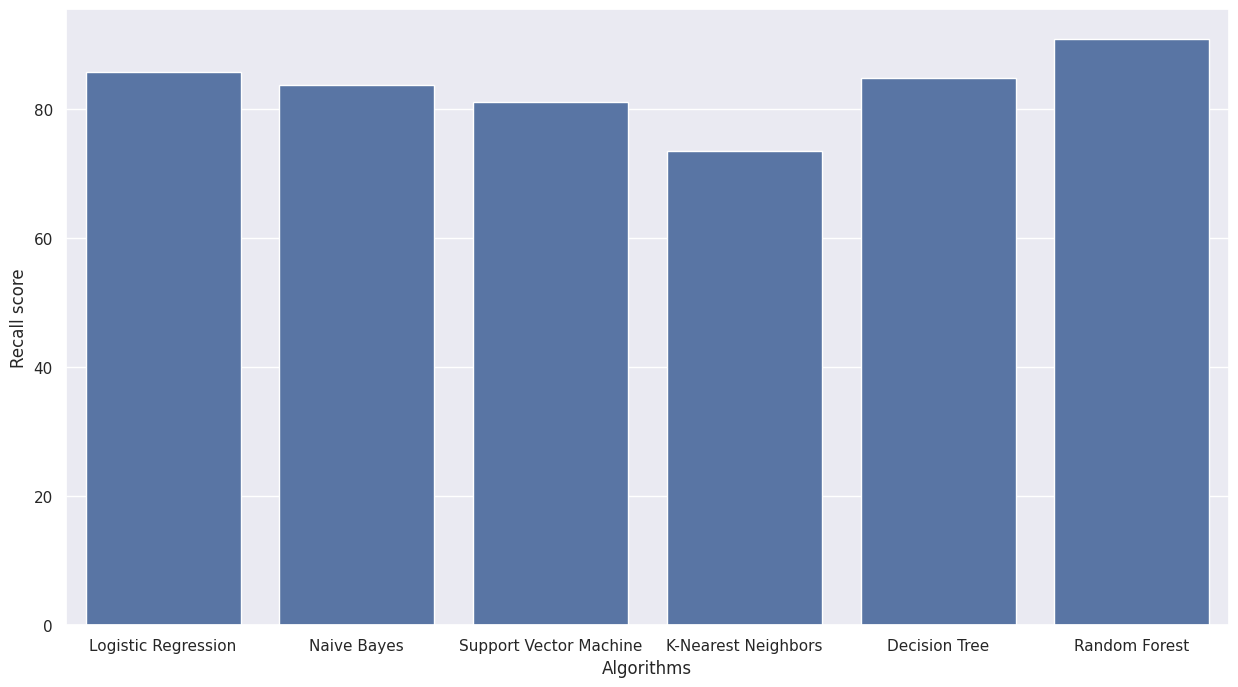

In [104]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Recall score")

sns.barplot(x=algorithms,y=rec_scores)

<Axes: xlabel='Algorithms', ylabel='f1 score'>

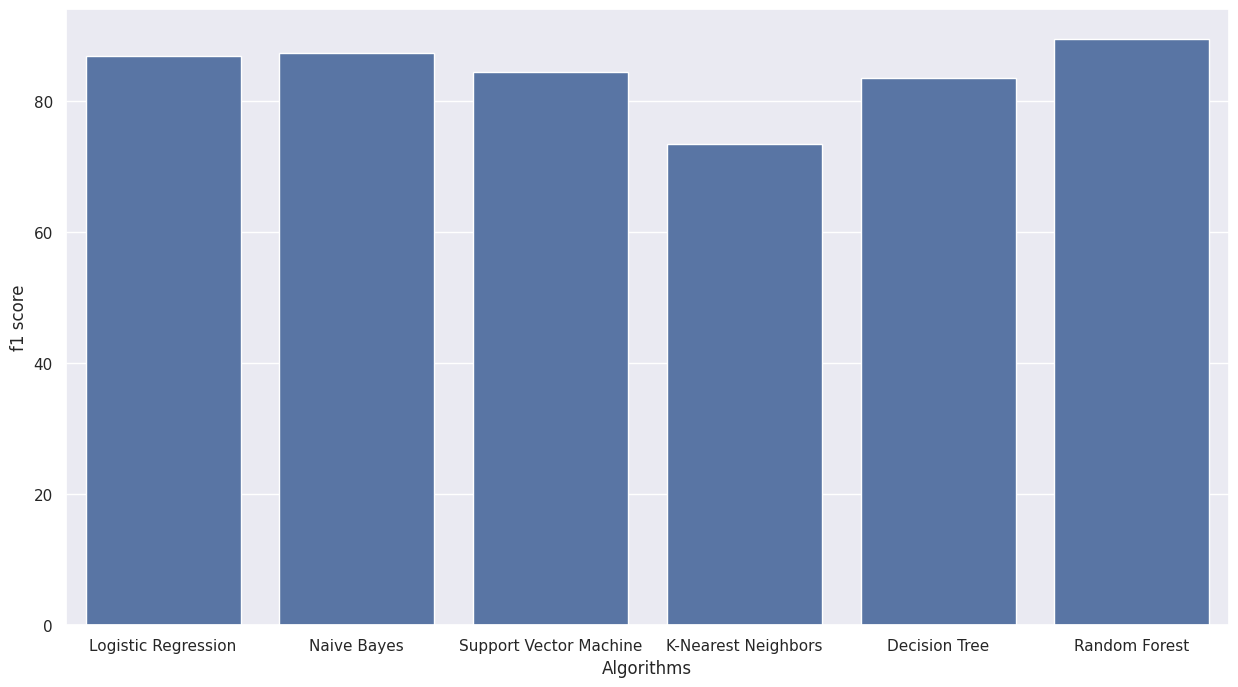

In [105]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("f1 score")

sns.barplot(x=algorithms,y=f1_scores)

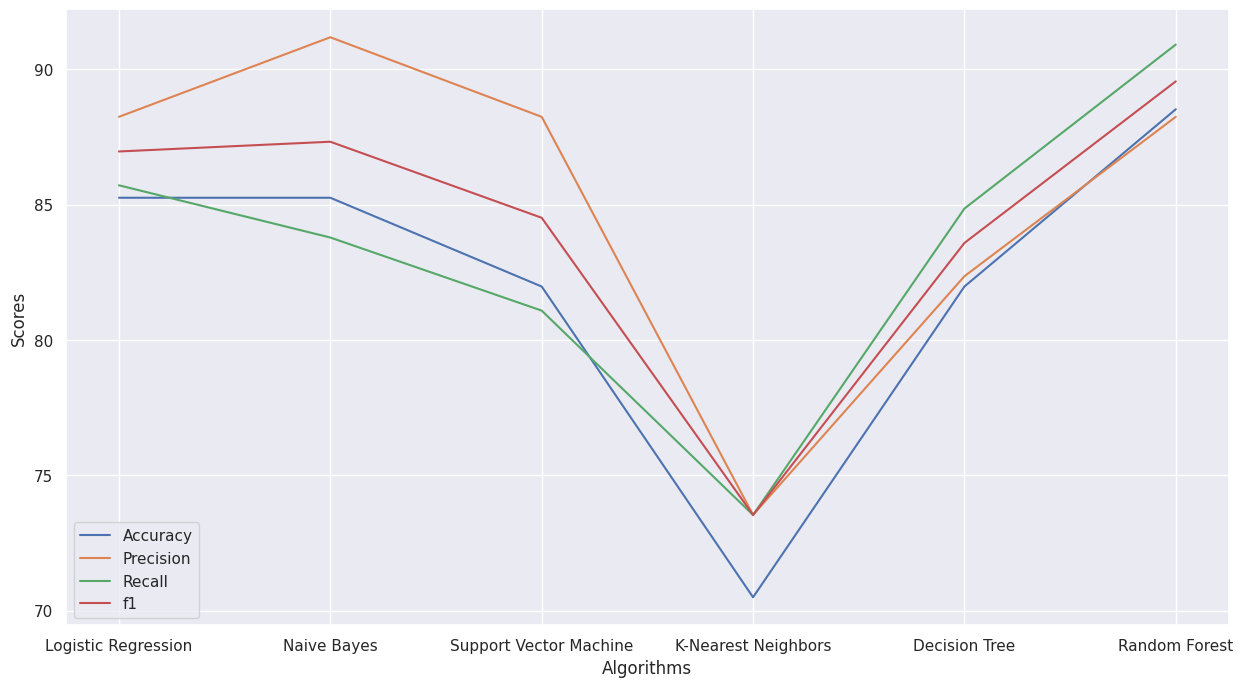

In [106]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Scores")
sns.lineplot(x=algorithms, y=Acc_scores, label='Accuracy')

sns.lineplot(x=algorithms, y=pre_scores, label='Precision')

sns.lineplot(x=algorithms, y=rec_scores, label='Recall')

sns.lineplot(x=algorithms, y=f1_scores, label='f1')

# Add legend
plt.legend()

plt.show()

In [107]:
x=X_test

In [108]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [109]:
x.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3


In [110]:
l = len(x)
l

61

In [111]:
input = x.iloc[[0]]
input

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3


In [112]:
def ensembel_all(X_test):
  a = []
  a.append(lr.predict(X_test).tolist()[0])
  a.append(knn.predict(X_test).tolist()[0])
  a.append(nb.predict(X_test).tolist()[0])
  a.append(sv.predict(X_test).tolist()[0])
  a.append(dt.predict(X_test).tolist()[0])
  a.append(rf.predict(X_test).tolist()[0])
  return a


In [113]:
a= ensembel_all(X_test.iloc[[0]])
a

[0, 0, 0, 0, 0, 0]

In [114]:
def result(X_test):
  ans = []
  length = len(X_test)

  for i in range(0,length):
    input = X_test.iloc[[i]]
    a = ensembel_all(input)
    count_1 = 0
    count_0 = 0
    for element in a:
      if element == 1:
        count_1 += 1
      else:
        count_0 +=1

    if count_1 > count_0:
      ans.append(1)
    elif count_0 > count_1:
      ans.append(0)
    else :
      ans.append(element)

  return ans



In [115]:
y_pred_final = result(X_test)
y_pred_final = np.array(y_pred_final)

In [116]:
y_pred_final

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [117]:
acc_score_all = round(accuracy_score(y_pred_final,Y_test)*100,2)

print("The accuracy score achieved using all models is: "+str(acc_score_all)+" %")

The accuracy score achieved using all models is: 86.89 %


In [118]:
pre_score_all = round(precision_score(y_pred_final,Y_test)*100,2)

print("The precison score achieved using all models is: "+str(pre_score_all)+" %")

The precison score achieved using all models is: 91.18 %


In [119]:
rec_score_all = round(recall_score(y_pred_final,Y_test)*100,2)

print("The recall score achieved using all models is: "+str(rec_score_all)+" %")

The recall score achieved using all models is: 86.11 %


In [120]:
f1_score_all = round(f1_score(y_pred_final,Y_test)*100,2)

print("The f1 score achieved using all models is: "+str(f1_score_all)+" %")

The f1 score achieved using all models is: 88.57 %
